In [2]:
import pandas as pd

# The train label dataset is already loaded below
data = pd.read_csv("tweets.csv")

In [3]:
data.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


### Data Preprocessing

In [4]:
import re

#Membersihkan kata yang mengandung karakter khusus
def cleaning(word):
  return re.sub('(http://\S+|\S*[^\w\s]\S*)','',word)

print(data.text[3])
data.text = list(map(cleaning, data.text))
print(data.text[3])

#Mengubah encoding %20 menjadi spasi
def decodespace(word):
  return word.replace("%20", " ")

print(data.keyword[120])
data.keyword = list(map(decodespace, data.keyword))
print(data.keyword[120])

Arsonist sets cars ablaze at dealership https://t.co/0gL7NUCPlb https://t.co/u1CcBhOWh9
Arsonist sets cars ablaze at dealership  
airplane%20accident
airplane accident


# Eksplorasi Data

## Agregasi Data

### Kolom Target

Target tweet dan Jumlahnya
╒════╤══════════╤══════════╕
│    │   Target │   jumlah │
╞════╪══════════╪══════════╡
│  0 │        1 │     2114 │
├────┼──────────┼──────────┤
│  1 │        0 │     9256 │
╘════╧══════════╧══════════╛


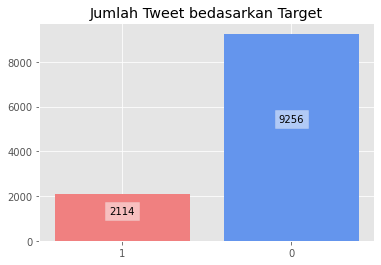

In [38]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

x = list(Counter(data.target).keys())
x = list(map(str, x))
y = list(Counter(data.target).values())

d = {'Target': x, 'jumlah': y}
df = pd.DataFrame(data=d)

## Print Tabel Jumlah Tweet bedasarkan Target
print("Target tweet dan Jumlahnya")
print(tabulate(df, tablefmt='fancy_grid', headers = 'keys'))

## Membuat Grafik Batang Jumlah Tweet bedasarkan Target
#Fungsi untuk membuat label
def addlabels(x,y):
  for i in range(len(x)):
    plt.text(i,y[i]//1.75,y[i], ha = 'center',
             Bbox = dict(facecolor = 'white', alpha = .5))

colors = np.array(["lightcoral","cornflowerblue"])

plt.bar(x, y, color = colors)
plt.title("Jumlah Tweet bedasarkan Target")
addlabels(x, y)
plt.show()

### Kolom Keywords

Jumlah keyword unik: 219
Keyword tweet dan Jumlahnya
╒════╤═══════════════════╤══════════╕
│    │ keyword           │   jumlah │
╞════╪═══════════════════╪══════════╡
│  0 │ ablaze            │       34 │
├────┼───────────────────┼──────────┤
│  1 │ accident          │       33 │
├────┼───────────────────┼──────────┤
│  2 │ aftershock        │       49 │
├────┼───────────────────┼──────────┤
│  3 │ airplane accident │       74 │
├────┼───────────────────┼──────────┤
│  4 │ ambulance         │       35 │
├────┼───────────────────┼──────────┤
│  5 │ annihilated       │       58 │
├────┼───────────────────┼──────────┤
│  6 │ annihilation      │       39 │
├────┼───────────────────┼──────────┤
│  7 │ apocalypse        │       43 │
├────┼───────────────────┼──────────┤
│  8 │ armageddon        │       26 │
├────┼───────────────────┼──────────┤
│  9 │ army              │       60 │
╘════╧═══════════════════╧══════════╛
Keyword tweet dan Jumlahnya (10 Jumlah Teratas)
╒═════╤══════════════╤═══

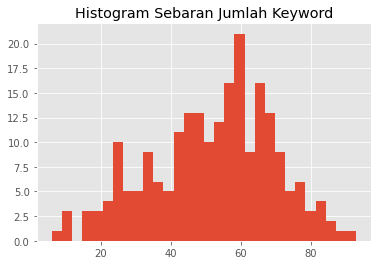

In [41]:
x = list(Counter(data.keyword).keys())
x = list(map(str, x))
y = list(Counter(data.keyword).values())

#Mengecek Jumlah Keyword yang Unik
print("Jumlah keyword unik:",len(x))

d = {'keyword': x, 'jumlah': y}
df = pd.DataFrame(data=d)

#Print Tabel Keyword tweet dan Jumlahnya
print("Keyword tweet dan Jumlahnya")
print(tabulate(df.head(n=10), tablefmt='fancy_grid', headers = 'keys'))

#Print Keyword tweet dan Jumlahnya (10 Jumlah Teratas)
df = df.sort_values("jumlah", axis = 0, ascending = False)
print("Keyword tweet dan Jumlahnya (10 Jumlah Teratas)")
print(tabulate(df.head(n=10), tablefmt='fancy_grid', headers = 'keys'))

#Print "Keyword tweet dan Jumlahnya (10 Jumlah Terendah)
df = df.sort_values("jumlah", axis = 0, ascending = True)
print("Keyword tweet dan Jumlahnya (10 Jumlah Terendah)")
print(tabulate(df.head(n=10), tablefmt='fancy_grid', headers = 'keys'))

#Menampilkan Sebaran Jumlah Keyword melalui Grafik Histogram
plt.style.use('ggplot')
plt.hist(y, bins=30)
plt.title("Histogram Sebaran Jumlah Keyword")
plt.show()

## Word Cloud

### Pembuatan Fungsi

In [7]:
from wordcloud import WordCloud, STOPWORDS

def mywordclod(myword) : 
    comment_words = ''
    stopwords = set(STOPWORDS)
 
# iterate through the csv file
    for val in myword:
        
        # typecaste each val to string
        val = str(val)
    
        # split the value
        tokens = val.split()
        
        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        
        comment_words += " ".join(tokens)+" "
    
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 16).generate(comment_words)
    
    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    
    plt.show()

### Word Cloud : Kolom Text

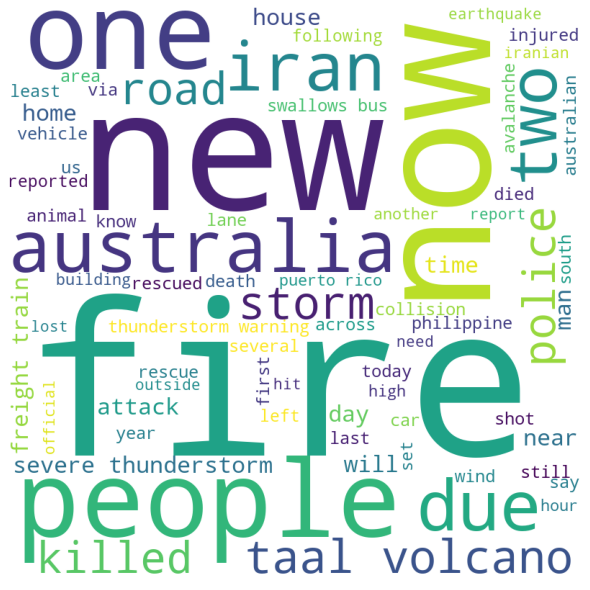

In [9]:
# Word Cloud untuk Kolom Text dengan Target = 1
data1 = data.loc[data.target==1]
mywordclod(data1.text)

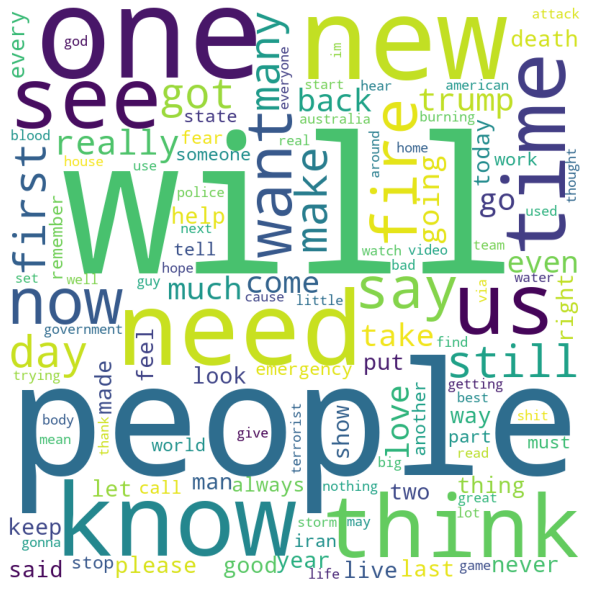

In [10]:
# Word Cloud untuk Kolom Text dengan Target = 0
data0 = data.loc[data.target==0]
mywordclod(data0.text)

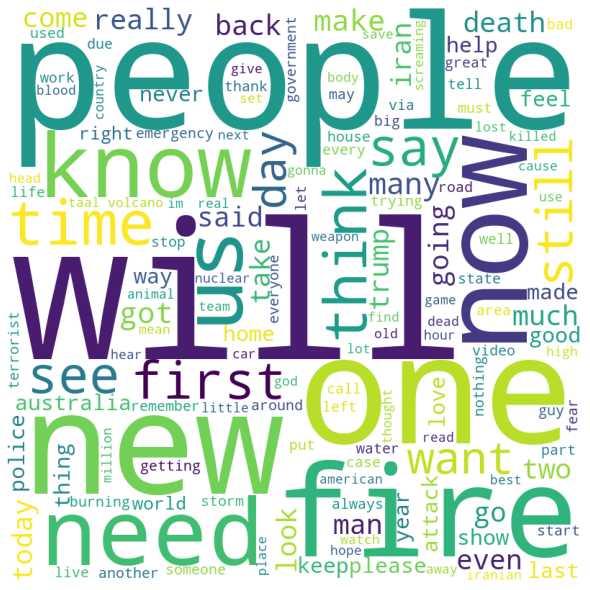

In [8]:
# Word Cloud untuk Kolom Text pada semua nilai Target
mywordclod(data.text)